<hr>

# Climate Change Prediction
#### Admin. No.: 166895
<hr>

### Background of the study

[2] Climate change is defined as the shift in climate patterns primarily caused by greenhouse gas emissions from natural systems and human activities. Anthropogenic activities have contributed to about 1.0°C of global warming above the pre-industrial level, and this is likely to reach 1.5°C between 2030 and 2052 if current emission rates persist. In 2015, the Paris Agreement was introduced with the main objective of limiting the global temperature increase to 2°C by 2100 and pursuing efforts to limit the increase to 1.5°C.

[3] Building upon this understanding, climate change poses a global threat with far-reaching impacts across various sectors. Its impact is felt in jeopardizing food production and global feeding patterns, threatening biodiversity, increasing disease risks, and devastating the tourism industry. These sectors bear the brunt of climate change's adverse effects, highlighting the urgency for comprehensive mitigation and adaptation strategies.

[4] Hence, international agreements like the Paris Climate Agreement play a significant role in mitigating climate change, while the potential use of biofuels offers a sustainable solution to reduce carbon emissions.[5] Estimating GHG emissions is a crucial initial step in evaluating the current emission status of countries based on existing data sets. 







### Research Objectives

1. To Compare the contributions of fossil fuel and land use change emissions to national and global warming.

2. Assess how fossil fuel-related CO2 emissions predict changes in global mean surface temperature.

3. Compare the temperature response to cumulative CO2 emissions with the response from cumulative CH4 and N2O emissions.

### Research Questions

1. How do emissions from fossil fuel use compare to those from land use changes in contributing to national and global warming?

2. How do fossil fuel-related CO2 emissions predict changes in global mean surface temperature?

3. How does the temperature response to cumulative CO2 emissions compare to the response from cumulative CH4 and N2O emissions?

### Data Description

**Title:** National Contributions to Global Warming from Historical Emissions of CO2, CH4, and N2O (1851-2021)

**Source:** This dataset is based on the latest findings of the Intergovernmental Panel on Climate Change (IPCC) and includes annual updates reflecting new national emissions data.

**Time Period:** 1851-2021

**Gases Included:**
- Carbon Dioxide (CO2)
- Methane (CH4)
- Nitrous Oxide (N2O)

**Purpose:** The dataset aims to track and apportion national contributions to global warming caused by historical emissions of CO2, CH4, and N2O. This is essential for informing equitable commitments to decarbonization and supporting international climate policy.

**Key Features:**

**National Contributions:** The dataset quantifies the contribution of each country to global warming based on historical emissions of CO2, CH4, and N2O.

**Global Mean Surface Temperature Response:** Includes calculations of the global mean surface temperature response to historical emissions, incorporating recent refinements that account for the short atmospheric lifetime of CH4.

**Sector Disaggregation:** Contributions are broken down by sector, distinguishing between fossil fuel emissions and land use-related emissions.

**Annual Updates:** The dataset is updated annually to reflect new national emissions data, ensuring its relevance and accuracy.

**Data Components:**

**Historical Emissions Data:** Annual emissions data for CO2, CH4, and N2O from 1851 to 2021 for each country.
Temperature Response Calculations: Estimates of the impact of these emissions on global mean surface temperature.

**Sectoral Contributions:** Data on emissions from fossil fuels and land use for each gas and each country.
Refinements: Adjustments and refinements to account for specific characteristics of each gas, such as the short atmospheric lifetime of CH4.


### References

[1] Jones, M. W., Peters, G. P., Gasser, T., Andrew, R. M., Schwingshackl, C., Gütschow, J., Houghton, R. A., Friedlingstein, P., Pongratz, J., & Le Quéré, C. (2023). National contributions to climate change due to historical emissions of carbon dioxide, methane, and nitrous oxide since 1850. Scientific Data, 10(1), 155. (https://doi.org/10.1038/s41597-023-02041-1)


[2] Fawzy, S., Osman, A. I., Doran, J., & Rooney, D. W. (2020). Strategies for mitigation of climate change: a review. Environmental Chemistry Letters, 18, 2069-2094. (https://link.springer.com/content/pdf/10.1007/s10311-020-01059-w.pdf)


[3] Abbass, K., Qasim, M. Z., Song, H., Murshed, M., Mahmood, H., & Younis, I. (2022). A review of the global climate change impacts, adaptation, and sustainable mitigation measures. Environmental Science and Pollution Research, 29(28), 42539-42559.

[4] Mikhaylov, A., Moiseev, N., Aleshin, K., & Burkhardt, T. (2020). Global climate change and greenhouse effect. Entrepreneurship and Sustainability Issues, 7(4), 2897.

[5] Kazancoglu, Y., Ozbiltekin-Pala, M., & Ozkan-Ozen, Y. D. (2021). Prediction and evaluation of greenhouse gas emissions for sustainable road transport within Europe. Sustainable Cities and Society, 70, 102924.

<hr>
<hr>

# Data Understanding

## Loading Libraries

In [24]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Loading the data

In [7]:
# global mean surface temperature
gmst_df=pd.read_csv('data/GHG Emissions/GMST_response_1851-2021.csv')

#cumulative emissions 
cumulative_emissions_df=pd.read_csv('data/GHG Emissions/EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv')

# country code
country_code_df = pd.read_csv('data/GHG Emissions/COUNTRY_GROUPINGS.csv')

In [8]:
gmst_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,2.047658e-07,°C
1,Afghanistan,AFG,3-GHG,Fossil,1852,4.112079e-07,°C
2,Afghanistan,AFG,3-GHG,Fossil,1853,6.193339e-07,°C
3,Afghanistan,AFG,3-GHG,Fossil,1854,8.291519e-07,°C
4,Afghanistan,AFG,3-GHG,Fossil,1855,1.040669e-06,°C


In [9]:
# Viewing the first few rows
cumulative_emissions_df.head()

,CNTR_NAME,ISO3,Gas,Component,Year,Data,Unit
0,Afghanistan,AFG,3-GHG,Fossil,1851,0.000455,Pg~CO[2]*-e[100]
1,Afghanistan,AFG,3-GHG,Fossil,1852,0.000913,Pg~CO[2]*-e[100]
2,Afghanistan,AFG,3-GHG,Fossil,1853,0.001375,Pg~CO[2]*-e[100]
3,Afghanistan,AFG,3-GHG,Fossil,1854,0.001841,Pg~CO[2]*-e[100]
4,Afghanistan,AFG,3-GHG,Fossil,1855,0.002311,Pg~CO[2]*-e[100]


In [10]:
country_code_df.shape

(26, 1)

In [11]:
cumulative_emissions_df.shape

(450585, 7)

In [12]:
gmst_df.shape

(450585, 7)

### Common Functions

In [13]:
def describeData(df): 
    print("--------------------")
    print(" OVERVIEW OF DATA ")
    print("--------------------")
    print(df.head())
    print("--------------------")
    print(" DATA TYPES ")
    print("--------------------")
    print(df.dtypes)
    print("--------------------")
    print(" DATAFRAME SHAPE ")
    print("--------------------")
    print(df.shape)
    
def summaryOfData(df):
    print("Statistical Summary of data")
    print(df.describe())

#  Checking for Outliers and Null Values
    
def checkNullValues(df):
    print("Null Values Present in Data")
    print(df.isna().sum() * 100 / len(df))


# Data Exploration

#### Checking for null values

In [14]:
describeData(gmst_df)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year          Data Unit
0  Afghanistan  AFG  3-GHG    Fossil  1851  2.047658e-07   °C
1  Afghanistan  AFG  3-GHG    Fossil  1852  4.112079e-07   °C
2  Afghanistan  AFG  3-GHG    Fossil  1853  6.193339e-07   °C
3  Afghanistan  AFG  3-GHG    Fossil  1854  8.291519e-07   °C
4  Afghanistan  AFG  3-GHG    Fossil  1855  1.040669e-06   °C
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(450585, 7)


In [17]:
describeData(cumulative_emissions_df)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year      Data              Unit
0  Afghanistan  AFG  3-GHG    Fossil  1851  0.000455  Pg~CO[2]*-e[100]
1  Afghanistan  AFG  3-GHG    Fossil  1852  0.000913  Pg~CO[2]*-e[100]
2  Afghanistan  AFG  3-GHG    Fossil  1853  0.001375  Pg~CO[2]*-e[100]
3  Afghanistan  AFG  3-GHG    Fossil  1854  0.001841  Pg~CO[2]*-e[100]
4  Afghanistan  AFG  3-GHG    Fossil  1855  0.002311  Pg~CO[2]*-e[100]
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(450585, 7)


#### Checking for null values

In [18]:
checkNullValues(gmst_df)

Null Values Present in Data
CNTR_NAME    0.0
ISO3         0.0
Gas          0.0
Component    0.0
Year         0.0
Data         0.0
Unit         0.0
dtype: float64


In [19]:
checkNullValues(cumulative_emissions_df)

Null Values Present in Data
CNTR_NAME    0.0
ISO3         0.0
Gas          0.0
Component    0.0
Year         0.0
Data         0.0
Unit         0.0
dtype: float64


### Merging the data: 

In [ ]:
temp_emissions_df = pd.merge(gmst_df, cumulative_emissions_df, on="Year", how="outer")

In [21]:
cumulative_emissions_df.columns

Index(['CNTR_NAME', 'ISO3', 'Gas', 'Component', 'Year', 'Data', 'Unit'], dtype='object')

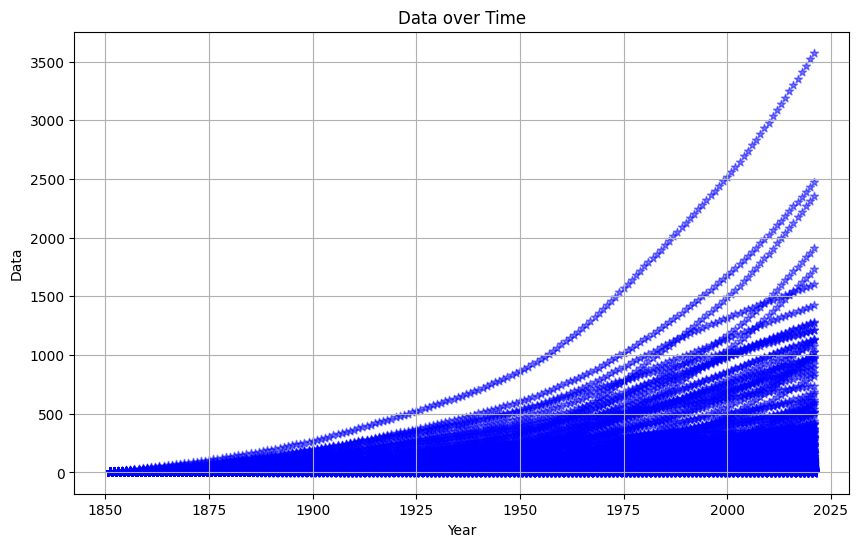

In [26]:

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cumulative_emissions_df['Year'], cumulative_emissions_df['Data'], marker='*', color='blue', alpha=0.5)  # Adjust marker and color as needed
plt.title('Data over Time')
plt.xlabel('Year')
plt.ylabel('Data')
plt.grid(True)

# Optionally, you can add trendlines, legends, etc. here

# Show plot
plt.show()

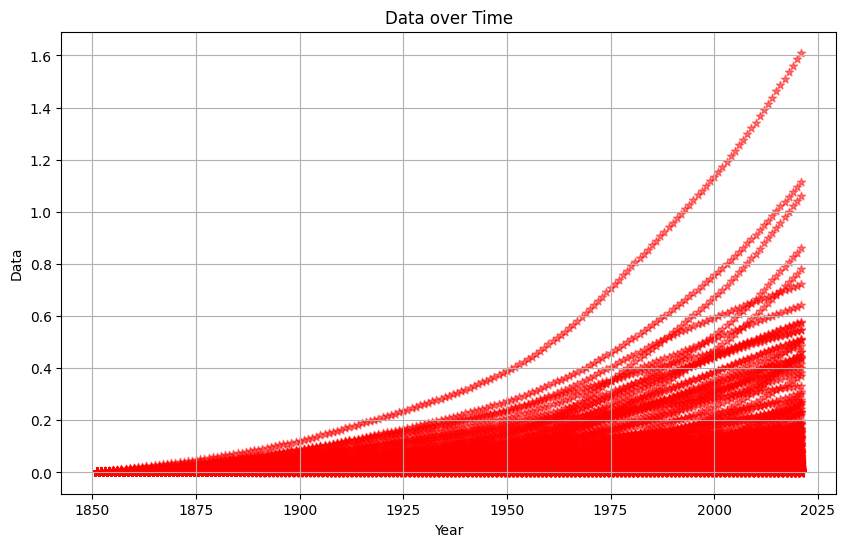

In [28]:

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gmst_df['Year'], gmst_df['Data'], marker='*', color='red', alpha=0.5)  # Adjust marker and color as needed
plt.title('Data over Time')
plt.xlabel('Year')
plt.ylabel('Data')
plt.grid(True)

# Optionally, you can add trendlines, legends, etc. here

# Show plot
plt.show()